<h1>Mandatory Exercise 2 Neural Networks<span class="tocSkip"></span></h1>

In this mandatory assignment, I have repeated same type of code again and again to illustrate the differences.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy import special

seed = 1

# Question 1

**Replace the activation function with the Sigmoid function. Train the network, and compare with the original activation function. What differences did you experience? Why do you think this difference happened?**

In Python one can implement Sigmoid function with:
`return 1 / (1 + np.exp(-x))`

But for large negative x the `np.exp(-x)` can lead to overflow.

So I have used `scipy.special.expit(x)` because it’s more robust and does not overflow for large negative values of x. We are unlikely to encounter such values here, I will use it anyway.

In [2]:
def relu(x):
    return (x > 0) * x 

def relu_grad(x):
    return x > 0

def sigmoid(x):
    return special.expit(x)

def sigmoid_grad(x):
    return sigmoid(x)*(1 - sigmoid(x))

#### Here we initialize the dataset and other values

In [3]:
streetlights = np.array([[1,0,1], 
                         [0,1,1], 
                         [0,0,1], 
                         [1,1,1], 
                         [0,1,1], 
                         [1,0,1]], dtype=np.float64)

In [4]:
walk_vs_stop = np.array([[0], [1], [0], [1], [1], [0]], dtype=np.float64)

In [5]:
X,y = streetlights, walk_vs_stop

In [6]:
hidden_nodes = 8

## Here the number of epochs and learning rate are initialized

In the original code, learning rate is 0.01 and epoch is 100. I'll keep learning rate as it is. But I'll use epoch = 10,000. That is to better observe the differences between ReLU and Sigmoid.

In [7]:
# number of iterations to go through the network.
# It was 100 in the original code, but we increase it to 10,000 to better observe differences between ReLU and Sigmoid
epochs = 10000
lr = 0.01    # the learning rate - how much we change the weights of the network each iteration

## Initialize Weights

Some references suggest different weight initializations for ReLU or Sigmoid.

E.g. in this link: https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/

One of the suggested weight initializations for Sigmoid is Normalized Xavier which can be implemented in Python like this:

`limit1 = math.sqrt(6.0 / (X.shape[1] + hidden_nodes))`

`limit2 = math.sqrt(6.0 / (hidden_nodes +  y.shape[1]))`

`ws_1 = np.random.uniform(-limit1, limit1, size=(X.shape[1], hidden_nodes))`

`ws_2 = np.random.uniform(-limit2, limit2, size=(hidden_nodes,  y.shape[1]))`

I choose to use the same initializations as in the original code.`

In [8]:
# Initializing weights
def init_weights():
    np.random.seed(seed)
    ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5
    ws_2 = np.random.rand(hidden_nodes, y.shape[1]) - 0.5
    return ws_1, ws_2

## Now We Compare the Training Performance of  ReLU vs Sigmoid Networks

Below I have made a function that implements training with both ReLU and Sigmoid. Since this will be repeated, it's more robust and secure to put it into a function.

In [9]:
def training(activation, epochs, lr, return_ws_list):
    ws_1, ws_2 = init_weights()
    error_list = list()
    ws_list_1 = list()
    ws_list_2 = list()
    mse = list()
    
    if activation == 'relu':
        for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
            for i in range(X.shape[0]): #for all samples in X, each streetlight
                layer_in = X[i:i+1]

                #forward pass/prediction
                layer_1 = relu(layer_in.dot(ws_1))

                layer_out = layer_1.dot(ws_2)

                #calc error/distance (how far are we from goal)
                
                delta_2 = layer_out - y[i:i+1]

                #calc the the error each node in prev layer contributed
                delta_1 = delta_2.dot(ws_2.T) * relu_grad(layer_1)
                    
                #update weights
                ws_2 -= lr * (layer_1.T.reshape(hidden_nodes,1).dot(delta_2))
                ws_1 -= lr * (layer_in.T.reshape(X.shape[1],1).dot(delta_1))

                error = delta_2**2
                    
                error_list.append(error[0][0])
                
            # The original code was printing last error from the dataset. 
            # Here we will save the MSE in an array and plot it.
            mse.append(sum(error_list) / X.shape[0])
            error_list = list()
            
            if return_ws_list:
                ws_list_1.append(ws_1.copy())
                ws_list_2.append(ws_2.copy())
    
    elif activation == 'sigmoid':
        for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
            for i in range(X.shape[0]): #for all samples in X, each streetlight
                layer_in = X[i:i+1]

                #forward pass/prediction
                layer_1 = sigmoid(layer_in.dot(ws_1))

                layer_out = layer_1.dot(ws_2)

                #calc error/distance (how far are we from goal)
                delta_2 = layer_out - y[i:i+1]

                #calc the the error each node in prev layer contributed
                delta_1 = delta_2.dot(ws_2.T) * sigmoid_grad(layer_1)


                #update weights
                ws_2 -= lr * (layer_1.T.reshape(hidden_nodes,1).dot(delta_2))
                ws_1 -= lr * (layer_in.T.reshape(X.shape[1],1).dot(delta_1))

                error = delta_2**2

                error_list.append(error[0][0])
        
            # The original code was printing last error from the dataset. 
            # Here we will save the MSE in an array and plot it.
            mse.append(sum(error_list) / X.shape[0])
            error_list = list()
            
            if return_ws_list:
                ws_list_1.append(ws_1.copy())
                ws_list_2.append(ws_2.copy())
    else:
        return False
    
    if return_ws_list:
        return mse, ws_list_1, ws_list_2
    else:
        return mse

#### ReLU

In [10]:
mse_relu, ws_list_1_relu, ws_list_2_relu = training('relu', epochs, lr, True)

### Sigmoid

In [11]:
mse_sigmoid, ws_list_1_sigmoid, ws_list_2_sigmoid = training('sigmoid', epochs, lr, True)

### Comparison

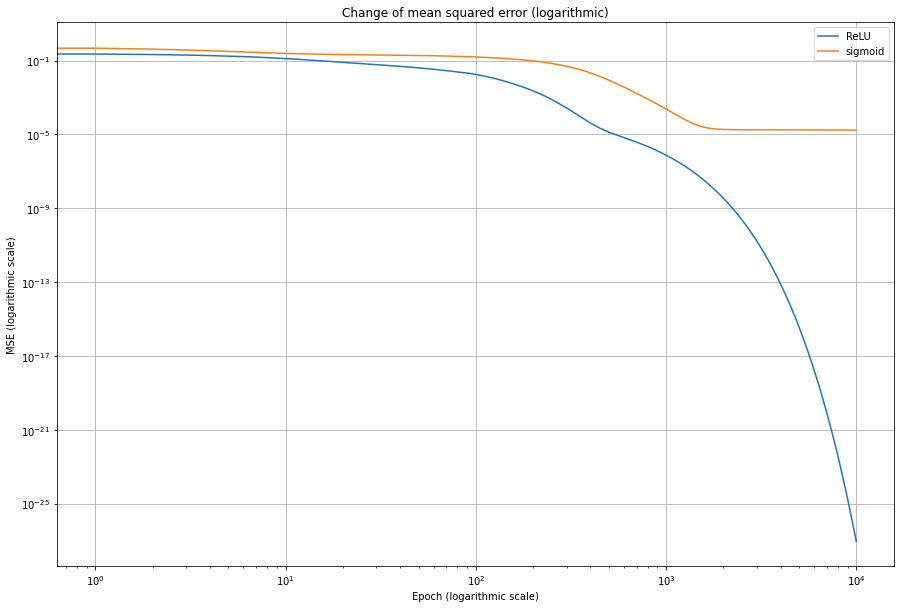

In [12]:
# Code to plot
x = np.linspace(0, epochs, epochs)

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.plot(x, mse_relu, label='ReLU')
ax.plot(x, mse_sigmoid, label = 'sigmoid')

ax.set_yscale('log')
ax.set_xscale('log')

plt.xlabel("Epoch (logarithmic scale)")
plt.ylabel("MSE (logarithmic scale)")
plt.title("Change of mean squared error (logarithmic)")
plt.legend()

plt.grid()
plt.show()

The graph above shows the difference between ReLU and Sigmoid, when learning rate is 0.01 and epoch = 10,000.

As seen with ReLU, MSE converges faster to some low value. But with Sigmoid MSE reduces at a slower rate and converges to a higher MSE.

## Weight Distribution During Training

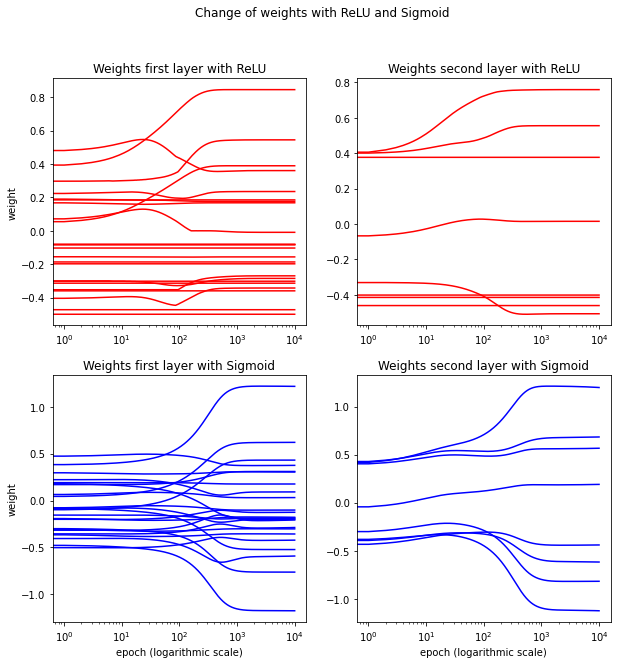

In [13]:
# Graph showing change of weights

fig, ax = plt.subplots(2,2,figsize=(10,10))

fig.suptitle("Change of weights with ReLU and Sigmoid")

plt.setp(ax[-1,:], xlabel='epoch (logarithmic scale)')
plt.setp(ax[:,0], ylabel='weight')

ws_list_1_relu = np.array(ws_list_1_relu)

ax[0][0].set_title('Weights first layer with ReLU')
for i in range(len(ws_list_1_relu[0])):
    for j in range(len(ws_list_1_relu[0][0])):
        label_str = 'w_'+str(i)+'_'+str(j)
        ax[0][0].plot(x, ws_list_1_relu[:, i, j], '-r', label=label_str)

ws_list_2_relu = np.array(ws_list_2_relu)
ax[0][1].set_title('Weights second layer with ReLU')
for i in range(len(ws_list_2_relu[0])):
    ax[0][1].plot(x, ws_list_2_relu[:, i], '-r', label='w_'+str(i))
    
ws_list_1_sigmoid = np.array(ws_list_1_sigmoid)
ax[1][0].set_title('Weights first layer with Sigmoid')
for i in range(len(ws_list_1_sigmoid[0])):
    for j in range(len(ws_list_1_sigmoid[0][0])):
        label_str = 'w_'+str(i)+'_'+str(j)
        ax[1][0].plot(x, ws_list_1_sigmoid[:, i, j], '-b', label=label_str)

ws_list_2_sigmoid = np.array(ws_list_2_sigmoid)
ax[1][1].set_title('Weights second layer with Sigmoid')
for i in range(len(ws_list_2_sigmoid[0])):
    ax[1][1].plot(x, ws_list_2_sigmoid[:, i], '-b', label='w_'+str(i))
    
ax[0][0].set_xscale('log')
ax[0][1].set_xscale('log')
ax[1][0].set_xscale('log')
ax[1][1].set_xscale('log')


Here we see how weights converge with ReLU and Sigmoid. The differences is not that big, but with ReLU the weights converge faster than with Sigmoid.

Comment on the distribution of weights: many of the the ReLU weights in the first layer, that start below zero, don't change much over time , this is due to the vanishing ReLU problem. Once the weight falls below zero it's gradient is zero and therefore it cannot learn further. This is not true for the Sigmoid.

## Comparing Different Learning rates

**Let's compare ReLU with Sigmoid using different learning rates:**

In [14]:
# Initializing lists to be used when plotting
learning_rates = [0.001, 0.01, 0.1, 1, 10]

plot_list = list()

for lr in learning_rates:
    #Initializing weights and list
    mse_sigmoid = training('sigmoid', epochs, lr, False)
    # appending to plot_list    
    plot_list.append(mse_sigmoid.copy())

In [15]:
# Initializing lists to be used when plotting

plot_list_relu = list()

for lr in learning_rates:
    #Initializing weights and list
    mse_relu = training('relu', epochs, lr, False)
    # appending to plot_list    
    plot_list_relu.append(mse_relu.copy())


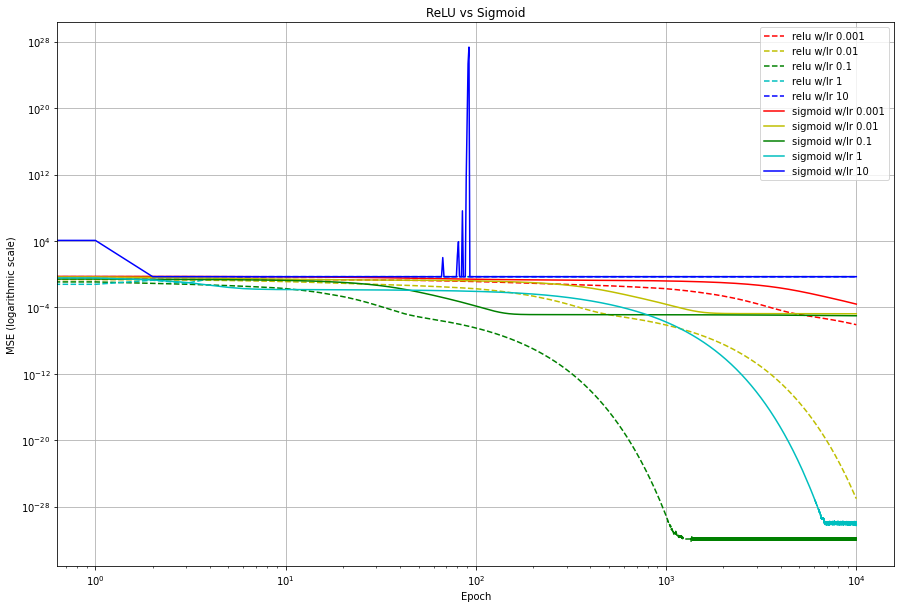

In [25]:
# Code to plot

# Colors to use
colors = ['r', 'y', 'g', 'c', 'b']

x = np.linspace(0, epochs, epochs)
fig, ax = plt.subplots(1, 1, figsize=(15,10))

for i in range(len(plot_list_relu)):
    ax.plot(x, plot_list_relu[i], colors[i], linestyle='dashed', label='relu w/lr '+str(learning_rates[i]))

for i in range(len(plot_list)):
    ax.plot(x, plot_list[i], colors[i], label='sigmoid w/lr '+str(learning_rates[i]))    

ax.set_yscale('log')
ax.set_xscale('log')

plt.xlabel("Epoch")
plt.ylabel("MSE (logarithmic scale)")

#plt.ylim(10e-35, 10e+01)
plt.title("ReLU vs Sigmoid")
plt.legend()
plt.grid()
plt.plot()
plt.show()

## Findings

### General

We see that both the speed of convergence and the final MSE depend on learning rate as well as the activation function.

But here we see that generally, for a specific learning rate, ReLU converges faster than Sigmoid, but it depends on learning rate and other factors as well.

And we see that when learning rate is 10 or 1, ReLU converges too fast but performs worse. Maybe because weights quickly reduces to zero or below. And when weights are zero or below, return of derivative of ReLU becomes zero too.

Why is that?

### Learning and Saturation of Activation Functions

Values of the input data are binary (1 or 0).

ReLU function is *non-saturating* function for positive weights, because its derivative is always non-zero. However, sigmoid is a saturating function for both large positive and negative values. Specifically:

It means $ReLU(x)\rightarrow\infty$ for $x\rightarrow\infty$, and derivative of ReLU is either 1 or 0.

But as $x\rightarrow\pm\infty$  $sigmoid(x)\rightarrow\infty$ and $\frac{d}{dx}sigmoid(x)\rightarrow 0$

The derivative of the activation function is used by  gradient descent,  it determines how much value of the weights change during training.

Since derivative of sigmoid approaches 0 in some activations, the gradient descent becomes slower, effectively the neuron becomes less ‘trainable’. But derivative of ReLU is either 1 or 0. So when it’s 1, it causes the values of the weights to converge quickly because the neuron remains receptive to the training signal. As a result convergence is rapid and robust.

To illustrate it, let’s assume a very simple model with only one input data x=1, one desired output y=1, and one weight, one layer. Let’s call activation function for a(x), which can be ReLU or Sigmoid. Learning rate is called mu ($\mu$).

Squared measured error and it’s derivative will be: 

$L(w) = (a(x) - y)^2$

$L’(w) = 2*( a(x) - y) * a’(x)$


We update weights by:

$w := w - \mu*L’(w)$

Which is same as

$w := w - \mu*2*( a(x) - y) * a’(x)$

$a’(x)$ determines how much the weight changes on each update.

The value of $a’(x)$ is always 1 in ReLU, so it will update weights more quickly. But with Sigmoid the value of $a’(x)$ is far below 1, so weights may not be updated so quickly. This may be the reason why the convergence is slower with Sigmoid than with ReLU.

This was just to illustrate, this is not how the code in assignment works. Our case has more samples, each row has 4 columns, it has 2 layers and more weights.

### Erratic Behaviour for High Learning Rates

Note the odd behavior when we use Sigmoid with learning rate = 10. The MSE progress during training spikes chaotically. When we look into data, the MSE changes a small amount on every iteration. It spikes 4 times, one is very big. This can occur because the excessive learning rate is causing the search for an optimal solution to 'over correct' for error and, instead of progressing slowly to an optimum, training is either quickly pinned to a local minimum (the higher learning rate greatly amplifies any learning signal) or 'bounces' all over the error surface in an erratic way. This behaviour can be seen for a variety of high learning rates.

# Question 2

**Do a search for the best learning rate. Also experiment with the necessary number of epochs. Use these values for learning rate: [0.001, 0.01, 0.1, 1, 10]. Report on your findings.**

The assignment doesn’t specify if I should use ReLU, Sigmoid, or choose between them. But since we changed from ReLU to Sigmoid I assume we’re going to use Sigmoid to find the best learning rate.

I tried with epoch 10,000 and learning rates 0.001, 0.01, 0.1, 1, and 10. 



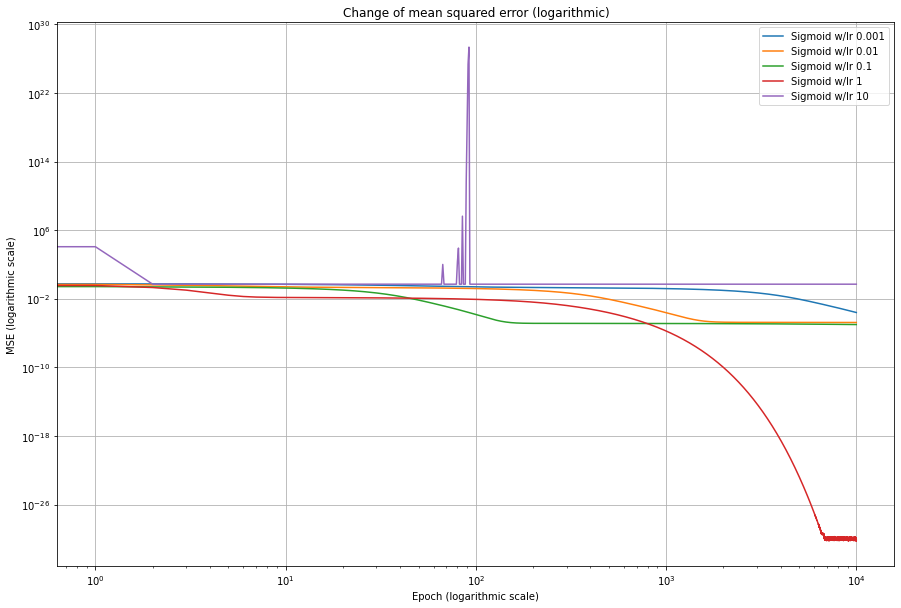

In [17]:
# Code to plot
x = np.linspace(0, epochs, epochs)
fig, ax = plt.subplots(1, 1, figsize=(15,10))

for i in range(len(plot_list)):
    ax.plot(x, plot_list[i], label='Sigmoid w/lr '+str(learning_rates[i]))

ax.set_yscale('log')
ax.set_xscale('log')

plt.xlabel("Epoch (logarithmic scale)")
plt.ylabel("MSE (logarithmic scale)")

plt.title("Change of mean squared error (logarithmic)")
#plt.ylim(10e-05,10e02)
plt.legend()
plt.grid()
plt.show()

The result is as seen, it converges fast when learning rate is 0.1. When learning rate is 1, it converges to a lower MSE when epoch is very high. But the difference is not that big (not in absolute values).

If the learning rate is too high, it can fail to reduce MSE. That's because the updates on weight are too big that it fails to find the optimal weights (see above). If the learning rate is too low, then it learns too slowly to find the minimum error within 10000 epochs.

MSE doesn't change much after 3000 anyway. With learning rate 0.1 and learning rate 0.01 the MSE reduces to almost same level, but with 0.1 it converges faster. So the best learning rate seems to be 0.1, and epoch = 300 is enough. But if you want more accuracy, then one can choose 1
0.01 or 1 as learning rate and epoch = 7,000 or 10,000.

In this case we don’t need to fear overfitting. How the traffic light works seems to be based on very predictable rules, there's no noise in the data (also no unpredicted results, no "exceptions from the rule"). So we want the algorithm to follow those rules exactly. Thus learning rate of 0.1 does it fine when MSE is as low as possible.



# Question 3

**Add another “hidden” layer(hidden layers exist between the input and output layers). Choose the size of the layer yourself. Retrain the network. Here, your knowledge about learning rate and epochs from the previous task might come in handy. Is this network more or less performant than the previous version? What does this change imply?**

Here we use epoch 10,000 (to observe better) and learning rate 0.1. I decided the second hidden layer should have 4 nodes, it's between first hidden layer and output layer.

In [18]:
epochs = 10000 # number of iterations to go through the network

lr = 0.1     # how much we change the weights of the network each iteration

hidden_nodes_2 = 4

In [19]:
np.random.seed(seed)
ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5
ws_2 = np.random.rand(hidden_nodes, hidden_nodes_2) - 0.5
ws_3 = np.random.rand(hidden_nodes_2, y.shape[1]) - 0.5

In [20]:


#Putting 3 layer network training into a function

def training_3_layer(epochs, lr):
    # initializing weights
    np.random.seed(seed)
    ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5
    ws_2 = np.random.rand(hidden_nodes, hidden_nodes_2) - 0.5
    ws_3 = np.random.rand(hidden_nodes_2, y.shape[1]) - 0.5

    mse = list()
    error_list = list()

    for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
        for i in range(X.shape[0]): #for all samples in X, each streetlight
            layer_in = X[i:i+1]

            #forward pass/prediction
            layer_1 = sigmoid(layer_in.dot(ws_1))

            layer_2 = sigmoid(layer_1.dot(ws_2))

            layer_out = layer_2.dot(ws_3) 

            #calc error/distance (how far are we from goal)
            delta_3 = layer_out - y[i:i+1]

            #calc the the error each node layer 2 contributed
            delta_2 = delta_3.dot(ws_3.T) * sigmoid_grad(layer_2)

            #calc the the error each node layer 1 contributed
            delta_1 = delta_2.dot(ws_2.T) * sigmoid_grad(layer_1)

            #update weights
            ws_3 -= lr * (layer_2.T.reshape(hidden_nodes_2,1).dot(delta_3))
            ws_2 -= lr * (layer_1.T.reshape(hidden_nodes,1).dot(delta_2))
            ws_1 -= lr * (layer_in.T.reshape(X.shape[1],1).dot(delta_1))

            error = delta_3**2

            error_list.append(error[0][0])

        mse.append(sum(error_list) / X.shape[0])
        error_list = list()
    
    return mse

#Calling the function here
mse = training_3_layer(epochs, lr)

In [21]:
x = np.linspace(0, epochs, epochs)


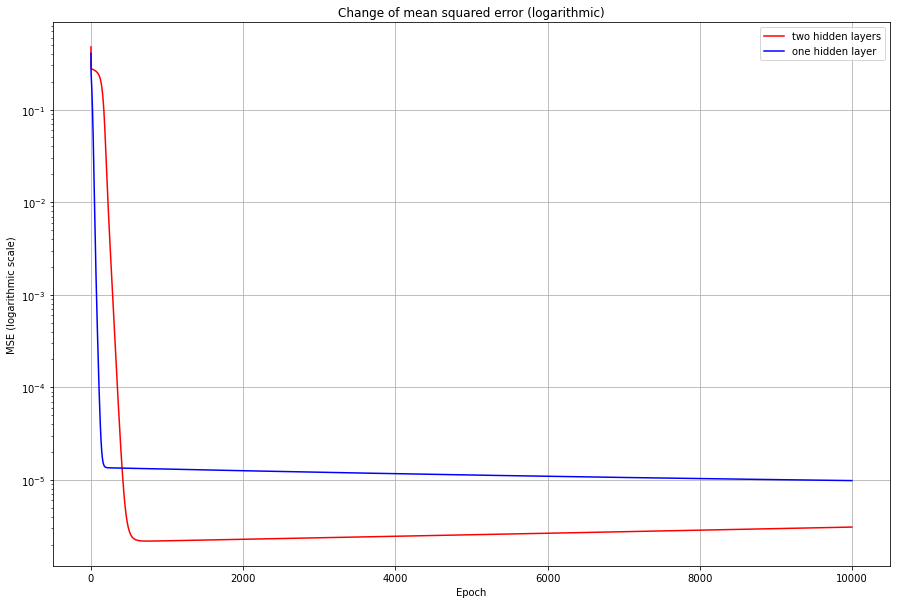

In [22]:
# Graph showing change of average error on each iteration

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.plot(x, mse, '-r', label="two hidden layers")
ax.plot(x, plot_list[2], '-b', label="one hidden layer")

ax.set_yscale('log')
#ax.set_xscale('log')

ax.set_title("2 hidden layer vs 3 hidden layer network")

plt.xlim()
plt.xlabel("Epoch")
plt.ylabel("MSE (logarithmic scale)")
plt.title("Change of mean squared error (logarithmic)")
plt.legend()
plt.grid()
plt.show()


From the graph above, one can see the MSE converges faster when there are one hidden layer, but MSE is reduced even more when we use only two hidden layers. MSE won't be always lower with one hidden layer, as it depends on other factors too, like different learning rates. It seems as with more layers the MSE converges faster, but it doesn't necessarily mean it will perform better. But the scala on Y axis is logarithmic, so the difference is not that big (not as big as it seems on the graph). But for some reason with two layers, the MSE starts increasing a slowly after ca 700 epoch.

Generally as the number of layers increases the ability of the network to learn to mode more complex functions increases, but above a certain limit training becomes hard (especially for sigmoid activation) due to the vanishing gradient problem.

**Below we see how it looks with different learning rates and compare "two hidden layer" with "one hidden layer"**

In [23]:
# Training network with different learning rates

plot_list_2 = list()

learning_rates = [0.001, 0.01, 0.1, 1, 10]

for lr in learning_rates:
    mse = training_3_layer(epochs, lr)
    # appending to plot_list    
    plot_list_2.append(mse.copy())

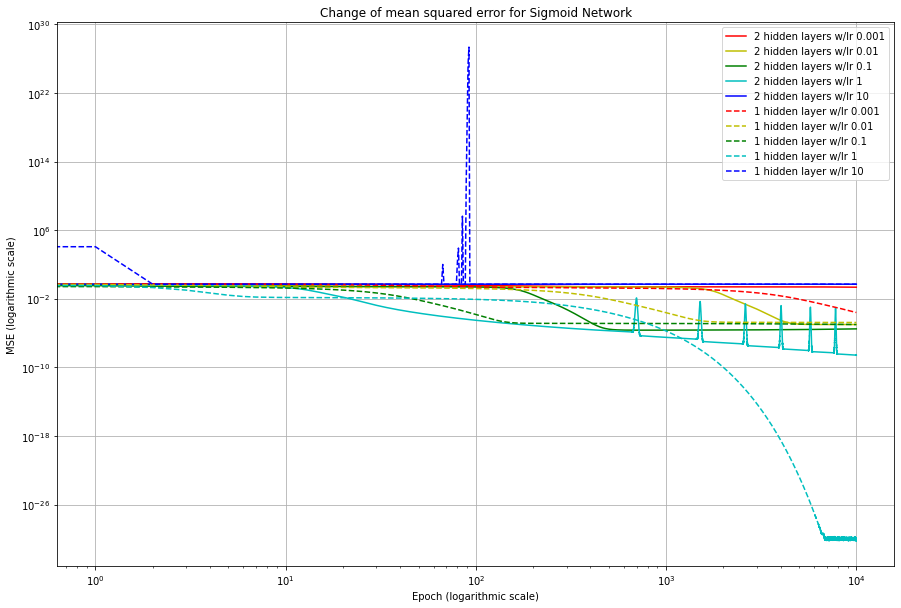

In [24]:
# Code to plot
x = np.linspace(0, epochs, epochs)
fig, ax = plt.subplots(1, 1, figsize=(15,10))

for i in range(len(plot_list_2)):
    ax.plot(x, plot_list_2[i], colors[i], label='2 hidden layers w/lr '+str(learning_rates[i]))

for i in range(len(plot_list)):
    ax.plot(x, plot_list[i], colors[i], linestyle='dashed', label='1 hidden layer w/lr '+str(learning_rates[i]))    

ax.set_yscale('log')
ax.set_xscale('log')

plt.xlabel("Epoch (logarithmic scale)")
plt.ylabel("MSE (logarithmic scale)")

#plt.ylim(10e-05, 10e-01)
plt.title("Change of mean squared error for Sigmoid Network")
plt.legend()
plt.grid()
plt.show()

Here the network performs depends on the learning rate too, but it seems that generally reduction of MSE is more when we use layer with one hidden layer.

The reason is that learning capacity of network increases with number of layers, because there are more weight and more weight interactions. So its ability to learn to approximate complex increases (and so does the speed). But then there is a diminishing return (especially with the sigmoid activation) above a certain number of layers due to vanishing gradients.

There are some big spikes when learning rate is 1 and 10 with 2 hidden layers, and when learning rate is 10 with 1 hidden layer.